# Import Libraries

### Import the usual libraries for data visualization and preparation

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import the data

For this practical we will be exploring publicly available data from LendingClub.Com. Lending club is a service that connects people who need to borrow money with people who have money to lend.

As a lender you would like to lend your money to people who have a high probability of paying you back. For this practical we will be exploring some borrower data and trying to predict whether or not the borrower is likely to repay the loan in full or not.

Column descriptions:
* Credit Policy: Indicates whether the customer meets the credit underwriting criteria of LendingClub.com
* Purpose: Why the borrower is taking the loan (Values: "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* Interest Rate: The interest rate of the loan. Borrowers who are considered more risky are given higher interest rates
* Installment: The monthly installments owed by the borrower if the loan is funded.
* Log annual income: The natural log of the annual income of the borrower.
* DTI: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* FICO: The FICO credit score of the borrower.
* Days with Credit Line: The number of days the borrower has had a credit line.
* Revolving Balance: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* Revolving Utilization: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* Inquiries last 6 months: The borrower's number of inquiries by creditors in the last 6 months.
* Delinq 2 years: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* Public records: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* Not fully paid: The column we are trying to predict, indicating whether the borrower fully paid back their loan or not

#### Import the data

Read in the LendingClub.csv into a pandas dataframe named df

In [82]:
df = pd.read_csv("LendingClub.csv" , sep=';')

#### Display the data

Display the top 10 rows in the dataframe

In [83]:
df.head(10)

,Credit Policy,Purpose,Interest Rate,Installment,Log annual income,DTI,FICO,Days with Credit Line,Revolving Balance,Revolving Utilization,Inquiries last 6 months,Delinq 2 years,Public records,Not fully Paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


## Data Exploration and Visualization

### Data Exploration

Display some more information about the dataset to investigate things such as whether the data set contains any nulls, how many rows of data your dataset contains as well as what data types can be found in your dataset.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit Policy            9578 non-null   int64  
 1   Purpose                  9578 non-null   object 
 2   Interest Rate            9578 non-null   float64
 3   Installment              9578 non-null   float64
 4   Log annual income        9578 non-null   float64
 5   DTI                      9578 non-null   float64
 6   FICO                     9578 non-null   int64  
 7   Days with Credit Line    9578 non-null   float64
 8   Revolving Balance        9578 non-null   int64  
 9   Revolving Utilization    9578 non-null   float64
 10  Inquiries last 6 months  9578 non-null   int64  
 11  Delinq 2 years           9578 non-null   int64  
 12  Public records           9578 non-null   int64  
 13  Not fully Paid           9578 non-null   int64  
dtypes: float64(6), int64(7),

In [85]:
df.describe()

,Credit Policy,Interest Rate,Installment,Log annual income,DTI,FICO,Days with Credit Line,Revolving Balance,Revolving Utilization,Inquiries last 6 months,Delinq 2 years,Public records,Not fully Paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [86]:
df['Purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [87]:
df['Purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: Purpose, dtype: int64

In [88]:
df.isna().sum()

Credit Policy              0
Purpose                    0
Interest Rate              0
Installment                0
Log annual income          0
DTI                        0
FICO                       0
Days with Credit Line      0
Revolving Balance          0
Revolving Utilization      0
Inquiries last 6 months    0
Delinq 2 years             0
Public records             0
Not fully Paid             0
dtype: int64

### Data Visualization

Let's begin exploring our data using visualization. When approaching a classification problem it is always a good starting point to have a look at the balance of the dataset

<AxesSubplot:xlabel='Not fully Paid', ylabel='count'>

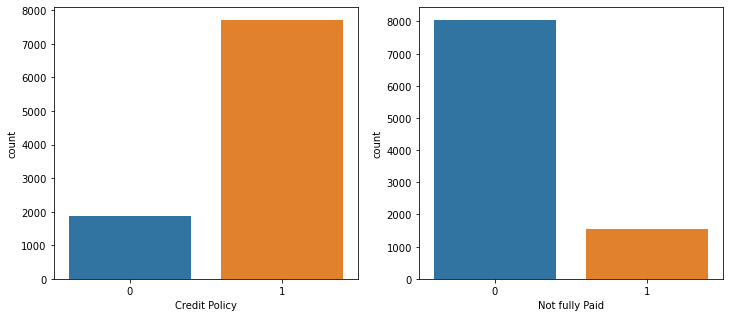

In [89]:
fig , ax = plt.subplots(1,2 ,figsize = (12,5))
sns.countplot(x = 'Credit Policy' , data = df , ax = ax[0])
sns.countplot(x = 'Not fully Paid' , data = df , ax = ax[1])

In this case the dataset is not very well balanced. There are far more cases where fully paid back their loan as compared to cases where users did not pay back their loan

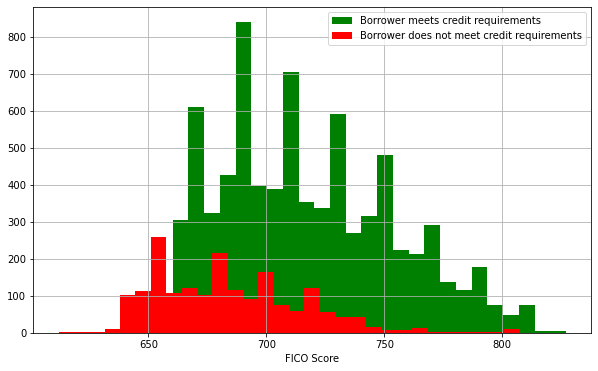

In [90]:
plt.figure(figsize = (10,6))
df[df['Credit Policy']==1]['FICO'].hist(bins=30, color = 'green', label = 'Borrower meets credit requirements')
df[df['Credit Policy']==0]['FICO'].hist(bins=30, color = 'red', label = 'Borrower does not meet credit requirements')
plt.xlabel("FICO Score")
plt.legend()

<AxesSubplot:xlabel='FICO', ylabel='count'>

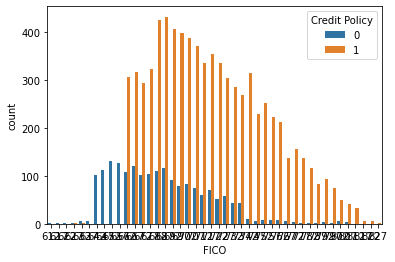

In [91]:
sns.countplot(x= df['FICO'] , hue = df['Credit Policy'] )

From the above we can quickly tell that the majority of people in our dataset have a credit policy equal to 1 as opposed to a credit policy equal to 0. Additionally we can see that people with a lower FICO score tend not to meet the credit under writing critera

### Feature Correlation

Let's explore which features are highly correlated to our target column

<AxesSubplot:>

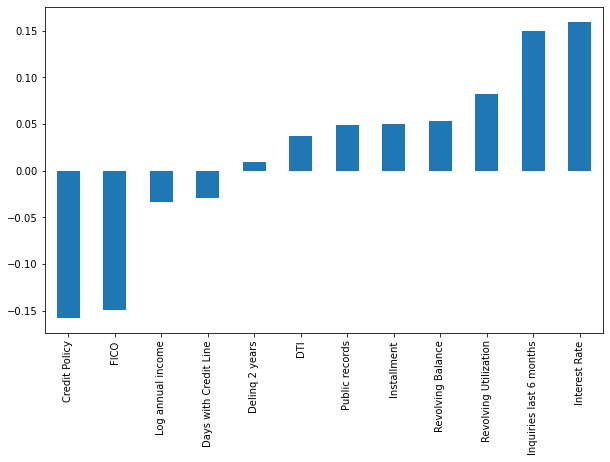

In [92]:
plt.figure(figsize = (10,6))
df.corr()['Not fully Paid'][:-1].sort_values().plot(kind = 'bar')

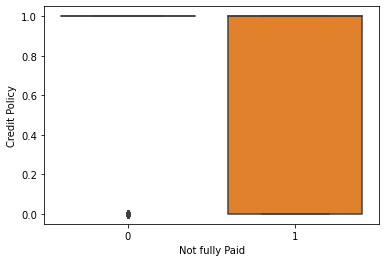

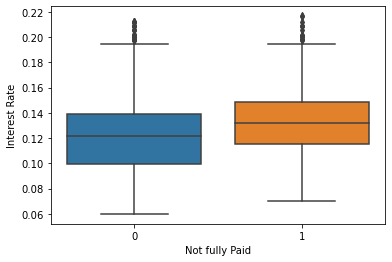

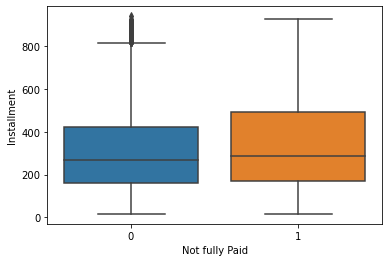

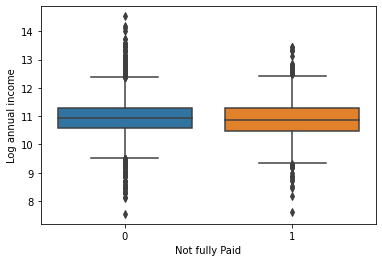

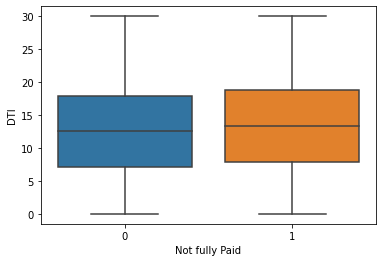

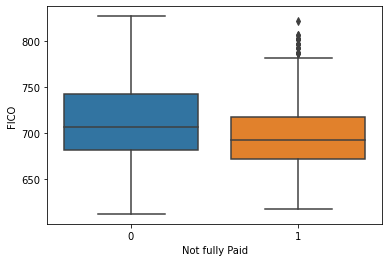

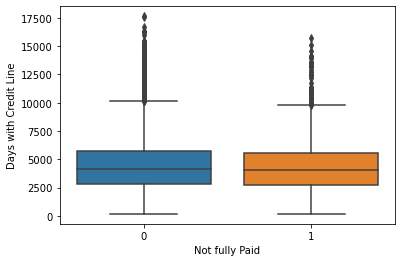

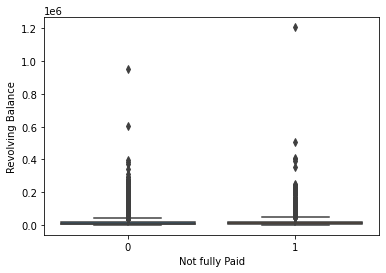

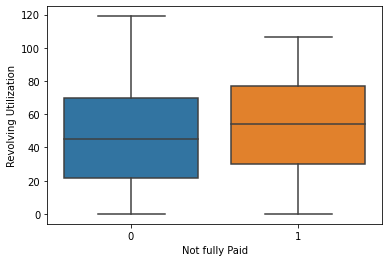

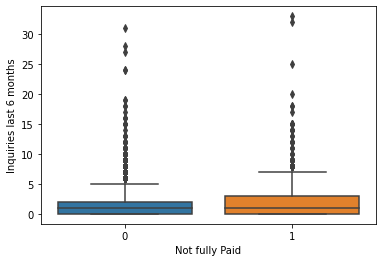

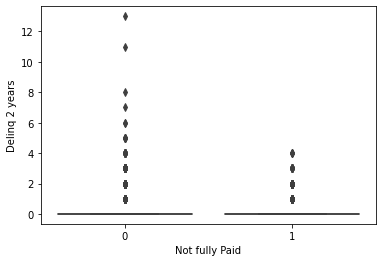

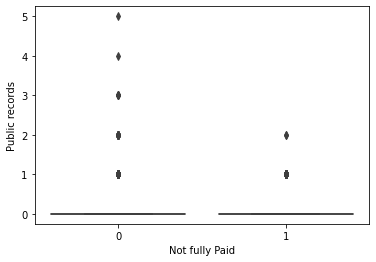

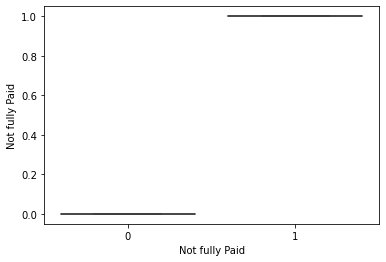

In [93]:
names = df.columns.tolist()
for col in names:
    try:
        pd.to_numeric(df[col])
        plt.figure()
        sns.boxplot(y = col , x = 'Not fully Paid' , data = df)
    except Exception:
        pass

<AxesSubplot:xlabel='Public records', ylabel='count'>

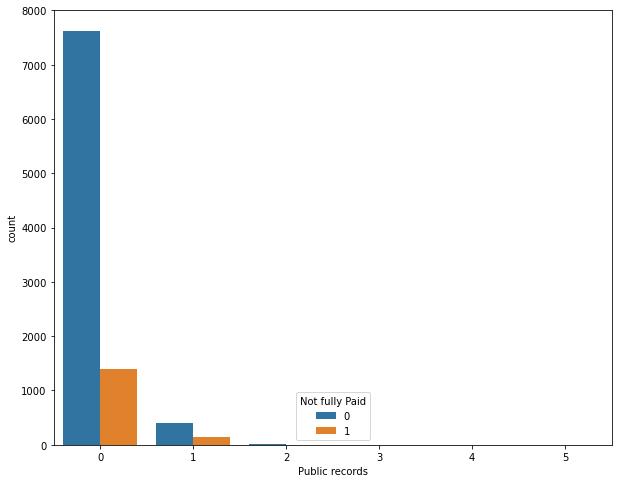

In [94]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'Public records', hue  = 'Not fully Paid' , data = df)

Text(0.5, 1.0, 'Borrowers who did fully repay their loan')

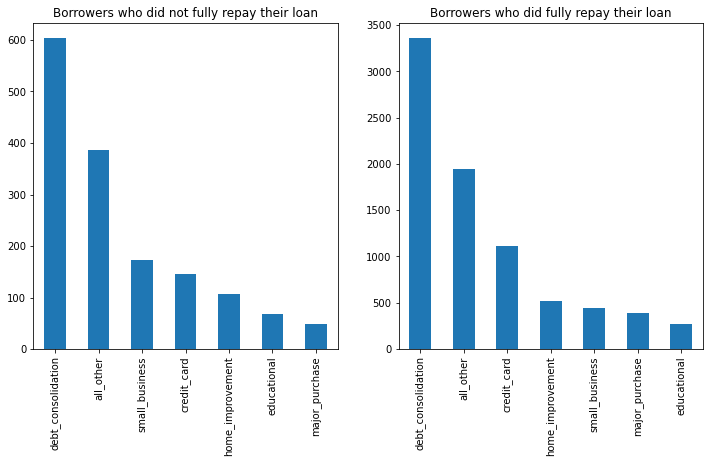

In [95]:
temp1 = df.Purpose[df['Not fully Paid'] == 1].value_counts()
temp0 = df.Purpose[df['Not fully Paid'] == 0].value_counts()

fig = plt.figure(figsize = (12,6))

ax1 = fig.add_subplot(1, 2, 1)
ax0 = fig.add_subplot(1, 2, 2)
temp1.plot(kind = 'bar', ax = ax1)
ax1.set_title('Borrowers who did not fully repay their loan')
temp0.plot(kind = 'bar', ax = ax0)
ax0.set_title('Borrowers who did fully repay their loan')

## Data Preparation

Drop the column: Delinq 2 years

In [96]:
df.drop(['Delinq 2 years'] , axis = 1 , inplace = True)

The issue we have with the below dummy columns is that the columns are perfect predictors for one another, as an example is if the first six columns are 0, we can know for sure that the last column will be 1. This is an issue known as multicollinearity. In order to address this issue we will drop the first column.

In [97]:
purpose = pd.get_dummies(df['Purpose'], drop_first = True)

In [98]:
purpose

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9573,0,0,0,0,0,0
9574,0,0,0,0,0,0
9575,0,1,0,0,0,0
9576,0,0,0,1,0,0


In [99]:
df = pd.concat([df , purpose] , axis = 1)

In [100]:
df.drop(['Purpose'] , axis = 1 , inplace = True)

## Train, test, split

In [101]:
x = df.drop('Not fully Paid' , axis = 1).values
y = df['Not fully Paid'].values

We need to turn them into numpy arrays (lists of lists) format for some steps

In [102]:
from sklearn.model_selection import train_test_split as tts

In [103]:
X_train , X_test , y_train , y_test = tts (x , y, test_size = 0.3 , random_state = 42)

In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler()

In [106]:
X_train = scaler.fit_transform(X_train)

In [107]:
X_test = scaler.transform(X_test)

Fitting the scaler model on training model and then transform (scale) the training data.
Then we only transform the testing data with the same already fitted algorithm.
This is a little different from fitting and transforming the data before splitting

## Create Random Forest Model

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
model = RandomForestClassifier(n_estimators = 150)

In [110]:
model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=150)

In [111]:
predictions = model.predict(X_test)

## Model Evaluation

In [112]:
from sklearn.metrics import classification_report , confusion_matrix

In [113]:
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.34      0.02      0.04       466

    accuracy                           0.83      2874
   macro avg       0.59      0.51      0.47      2874
weighted avg       0.76      0.83      0.77      2874



In [114]:
print(confusion_matrix(y_test , predictions))

[[2389   19]
 [ 456   10]]
